In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


upload dataset 1

In [0]:
from google.colab import files
uploded = files.upload()

Saving student-mat.csv to student-mat.csv


upload dataset 2

In [0]:
uploded = files.upload()

Saving student-por.csv to student-por.csv


# preprocessing data

In [0]:
mat = pd.read_csv("student-mat.csv", sep=';')
por = pd.read_csv("student-por.csv", sep=';')

In [0]:
df = pd.concat([mat,por])
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [0]:
df = df[df.columns.difference(['G3'])]
df 

,Dalc,Fedu,Fjob,G1,G2,Medu,Mjob,Pstatus,Walc,absences,activities,address,age,failures,famrel,famsize,famsup,freetime,goout,guardian,health,higher,internet,nursery,paid,reason,romantic,school,schoolsup,sex,studytime,traveltime
0,1,4,teacher,5,6,4,at_home,A,1,6,no,U,18,0,4,GT3,no,3,4,mother,3,yes,no,yes,no,course,no,GP,yes,F,2,2
1,1,1,other,5,5,1,at_home,T,1,4,no,U,17,0,5,GT3,yes,3,3,father,3,yes,yes,no,no,course,no,GP,no,F,2,1
2,2,1,other,7,8,1,at_home,T,3,10,no,U,15,3,4,LE3,no,3,2,mother,3,yes,yes,yes,yes,other,no,GP,yes,F,2,1
3,1,2,services,15,14,4,health,T,1,2,yes,U,15,0,3,GT3,yes,2,2,mother,5,yes,yes,yes,yes,home,yes,GP,no,F,3,1
4,1,3,other,6,10,3,other,T,2,4,no,U,16,0,4,GT3,yes,3,2,father,5,yes,no,yes,yes,home,no,GP,no,F,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,3,other,10,11,2,services,T,2,4,yes,R,19,1,5,GT3,no,4,2,mother,5,yes,yes,no,no,course,no,MS,no,F,3,1
645,1,1,services,15,15,3,teacher,T,1,4,no,U,18,0,4,LE3,yes,3,4,mother,1,yes,yes,yes,no,course,no,MS,no,F,2,1
646,1,1,other,11,12,1,other,T,1,6,yes,U,18,0,1,GT3,no,1,1,mother,5,yes,no,yes,no,course,no,MS,no,F,2,2
647,3,1,services,10,10,3,services,T,4,6,no,U,17,0,2,LE3,no,4,5,mother,2,yes,yes,no,no,course,no,MS,no,M,1,2


In [0]:
df.isnull().any()

Dalc          False
Fedu          False
Fjob          False
G1            False
G2            False
Medu          False
Mjob          False
Pstatus       False
Walc          False
absences      False
activities    False
address       False
age           False
failures      False
famrel        False
famsize       False
famsup        False
freetime      False
goout         False
guardian      False
health        False
higher        False
internet      False
nursery       False
paid          False
reason        False
romantic      False
school        False
schoolsup     False
sex           False
studytime     False
traveltime    False
dtype: bool

In [0]:
df_new = pd.get_dummies(df)
df_new.describe()

,Dalc,Fedu,G1,G2,Medu,Walc,absences,age,failures,famrel,freetime,goout,health,studytime,traveltime,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Pstatus_A,Pstatus_T,activities_no,activities_yes,address_R,address_U,famsize_GT3,famsize_LE3,famsup_no,famsup_yes,guardian_father,guardian_mother,guardian_other,higher_no,higher_yes,internet_no,internet_yes,nursery_no,nursery_yes,paid_no,paid_yes,reason_course,reason_home,reason_other,reason_reputation,romantic_no,romantic_yes,school_GP,school_MS,schoolsup_no,schoolsup_yes,sex_F,sex_M
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,1.494253,2.387931,11.213602,11.246169,2.603448,2.284483,4.434866,16.726054,0.264368,3.935824,3.201149,3.156130,3.543103,1.970307,1.522989,0.059387,0.039272,0.559387,0.279693,0.062261,0.185824,0.078544,0.382184,0.228927,0.124521,0.115900,0.884100,0.505747,0.494253,0.272989,0.727011,0.706897,0.293103,0.386973,0.613027,0.232759,0.697318,0.069923,0.085249,0.914751,0.207854,0.792146,0.200192,0.799808,0.789272,0.210728,0.411877,0.247126,0.103448,0.237548,0.644636,0.355364,0.739464,0.260536,0.886015,0.113985,0.566092,0.433908
std,0.911714,1.099938,2.983394,3.285071,1.124907,1.285105,6.210017,1.239975,0.656142,0.933401,1.031507,1.152575,1.424703,0.834353,0.731727,0.236461,0.194335,0.496699,0.449064,0.241744,0.389151,0.269155,0.486154,0.420344,0.330333,0.320259,0.320259,0.500207,0.500207,0.445708,0.445708,0.455404,0.455404,0.487291,0.487291,0.422792,0.459639,0.255140,0.279386,0.279386,0.405967,0.405967,0.400335,0.400335,0.408021,0.408021,0.492409,0.431548,0.304689,0.425785,0.478853,0.478853,0.439138,0.439138,0.317945,0.317945,0.495850,0.495850
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,9.000000,9.000000,2.000000,1.000000,0.000000,16.000000,0.000000,4.000000,3.000000,2.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,11.000000,11.000000,3.000000,2.000000,2.000000,17.000000,0.000000,4.000000,3.000000,3.000000,4.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,2.000000,3.000000,13.000000,13.000000,4.00

In [0]:
df_new

,Dalc,Fedu,G1,G2,Medu,Walc,absences,age,failures,famrel,freetime,goout,health,studytime,traveltime,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Pstatus_A,Pstatus_T,activities_no,activities_yes,address_R,address_U,famsize_GT3,famsize_LE3,famsup_no,famsup_yes,guardian_father,guardian_mother,guardian_other,higher_no,higher_yes,internet_no,internet_yes,nursery_no,nursery_yes,paid_no,paid_yes,reason_course,reason_home,reason_other,reason_reputation,romantic_no,romantic_yes,school_GP,school_MS,schoolsup_no,schoolsup_yes,sex_F,sex_M
0,1,4,5,6,4,1,6,18,0,4,3,4,3,2,2,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,1,0
1,1,1,5,5,1,1,4,17,0,5,3,3,3,2,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0
2,2,1,7,8,1,3,10,15,3,4,3,2,3,2,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0
3,1,2,15,14,4,1,2,15,0,3,2,2,5,3,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0,1,0
4,1,3,6,10,3,2,4,16,0,4,3,2,5,2,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,3,10,11,2,2,4,19,1,5,4,2,5,3,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0
645,1,1,15,15,3,1,4,18,0,4,3,4,1,2,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,1,1,0,1,0
646,1,1,11,12,1,1,6,18,0,1,1,1,5,2,2,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,1,0
647,3,1,10,10,3,4,6,17,0,2,4,5,2,1,2,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1


In [0]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 58 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Dalc               1044 non-null   int64
 1   Fedu               1044 non-null   int64
 2   G1                 1044 non-null   int64
 3   G2                 1044 non-null   int64
 4   Medu               1044 non-null   int64
 5   Walc               1044 non-null   int64
 6   absences           1044 non-null   int64
 7   age                1044 non-null   int64
 8   failures           1044 non-null   int64
 9   famrel             1044 non-null   int64
 10  freetime           1044 non-null   int64
 11  goout              1044 non-null   int64
 12  health             1044 non-null   int64
 13  studytime          1044 non-null   int64
 14  traveltime         1044 non-null   int64
 15  Fjob_at_home       1044 non-null   uint8
 16  Fjob_health        1044 non-null   uint8
 17  Fjob_other     

In [0]:
clt = df_new[['G1','G2']]
clt = clt.astype('float32', copy = False)

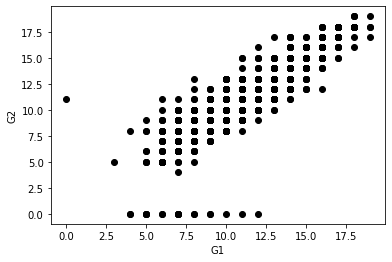

In [0]:
plt.scatter(clt['G1'], clt['G2'], color = 'k')
plt.xlabel('G1')
plt.ylabel('G2')
plt.show()

## membuat dataframe untuk setiap metode clustering

In [0]:
import numpy as np

cltKM = np.array(clt)
cltDB = np.array(clt)
cltAGL = np.array(clt)

# K-Means Clustering

In [0]:
#normalisasi dataframe

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cltKM = scaler.fit_transform(cltKM)

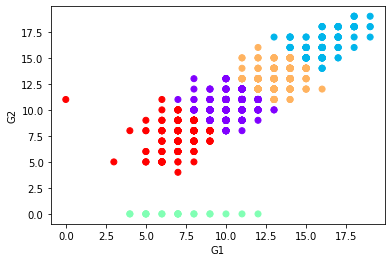

In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(cltKM)
kmeans_pred = kmeans.fit_predict(cltKM)

plt.scatter(clt['G1'],clt['G2'],c=kmeans.labels_,cmap='rainbow')
plt.xlabel("G1")
plt.ylabel("G2")
plt.show()

# DBSCAN Clustering

In [0]:
from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler().fit(cltDB)
cltDB = stdscaler.transform(cltDB)

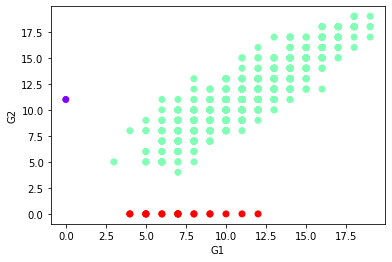

In [0]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.9, min_samples = 6)
dbscan.fit(cltDB)
dbscan_pred = dbscan.fit_predict(cltDB)

plt.scatter(clt['G1'],clt['G2'],c=dbscan.labels_,cmap='rainbow')
plt.xlabel("G1")
plt.ylabel("G2")
plt.show()

In [0]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

# Agglomerative Clustering

In [0]:
aggl_scale = StandardScaler().fit(cltAGL)
cltAGL = aggl_scale.transform(cltAGL)

In [0]:
from sklearn.cluster import AgglomerativeClustering

aggl = AgglomerativeClustering()
aggl.fit(cltAGL)
aggl_pred = aggl.fit_predict(cltAGL)
aggl.labels_


array([0, 0, 0, ..., 0, 0, 0])

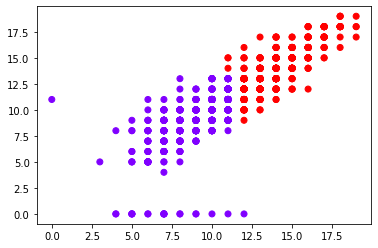

In [0]:
plt.scatter(clt['G1'],clt['G2'],c=aggl.labels_,cmap='rainbow')
plt.show()

# Evaluasi


In [0]:
#silhouette Index

from sklearn.metrics import silhouette_score as ss

score_km = ss(clt,kmeans_pred)
score_dbscan = ss(clt,dbscan_pred)
score_aggl = ss(clt,aggl_pred)

print(score_km)
print(score_dbscan)
print(score_aggl)

0.44256887
0.5451734
0.49357653
